# Data Wrangling I

## What is the purpose of data wrangling?

<p>You use data wrangling to convert data from an initial format to a format that may be better for analysis.</p>

## What is the fuel consumption (L/100k) rate for the diesel car?

### Import data

<p>You can find the dataset from <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data">this</a>. And you will be using this dataset throughout this case.</p>

#### Importing Required Libraries

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import requests
import os

#### Reading the dataset from the URL and adding the related headers

<p>The function below will download the dataset onto your computer.</p>

In [2]:
dir_path = os.path.join(".", "data")
os.makedirs(dir_path, exist_ok=True)

def download_file(url: str) -> str:
    with requests.get(url=url, stream=True) as response:
        response.raise_for_status()

        filepath = os.path.join(dir_path, url.rsplit("/", 1)[-1])
        total_size = int(response.headers.get("Content-Length", 0))
        chunk_size = 1024 ** 2
        download_size = 0

        with open(filepath, "wb") as file:
            for chunk in response.iter_content(chunk_size=chunk_size):
                if not chunk:
                    continue

                file.write(chunk)
                download_size += len(chunk)

                if total_size > 0:
                    progress = (download_size / total_size) * 100
                    print(f"Downloading: {progress:.2f}% ({download_size} / {total_size} bytes)")

    print("Download Complete.")
    return filepath

<p>First, assign the URL of the dataset to "data_url".</p>

In [3]:
data_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

<p>To obtain the dataset, utilize the <code>download_file()</code> function as defined above:</p>

In [4]:
filename = download_file(data_url)

Downloading: 100.00% (24916 / 24916 bytes)
Download Complete.


<p>Then, create a list <b>headers</b> containing name of headers.</p>

In [5]:
headers = [
    "symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style", "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type", "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower", "peak-rpm","city-mpg","highway-mpg","price"
]

<p>Use the Pandas method <b>read_csv()</b> to load the data from the web address. Set the parameter "names" equal to the Python list "headers".</p>

In [6]:
df = pd.read_csv(filename, names=headers)

<p>Use the method <code>head()</code> to display the first five rows of the dataframe.</p>

In [7]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>As you can see, several question marks appeared in the dataframe, those missing values may hinder further analysis. So, how do we identify all those missing values and deal with them?</p>
<p><b>How to work with missing data?</b></p>
<p>Steps for working with missing data:</p>
<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>

### Identify and handle missing values

#### Identify missing values

#### Convert `?` to `NaN`

<p>In the car dataset, missing data comes with the question mark "?".
We replace "?" with NaN (Not a Number), Python's default missing value marker for reasons of computational speed and convenience. Use the function:</p>
<pre>.replace(A, B, inplace=True)</pre>
<p>to replace A by B.</p>

In [8]:
df.replace("?", np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Evaluating for Missing Data

<p>The missing values are converted by default. Use the following functions to identify these missing values. You can use two methods to detect missing data:</p>
<ol>
    <li><code>.isnull()</code></li>
    <li><code>.notnull()</code></li>
</ol>
<p>The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.</p>

In [9]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<p><code>True</code> means the value is a missing value while <code>False</code> means the value is not a missing value.</p>

#### Count missing values in each column

<p>Using a <code>for</code> loop in Python, you can quickly figure out the number of missing values in each column. As mentioned above, <code>True</code> represents a missing value and <code>False</code> means the value is present in the dataset. In the body of the for loop the method <code>.value_counts()</code> counts the number of <code>True</code> values.</p>

In [10]:
count = 1
for column in missing_data.columns.values.tolist():
    print(f"{count}. {missing_data[column].value_counts()}", end="\n\n")
    count += 1

1. symboling
False    205
Name: count, dtype: int64

2. normalized-losses
False    164
True      41
Name: count, dtype: int64

3. make
False    205
Name: count, dtype: int64

4. fuel-type
False    205
Name: count, dtype: int64

5. aspiration
False    205
Name: count, dtype: int64

6. num-of-doors
False    203
True       2
Name: count, dtype: int64

7. body-style
False    205
Name: count, dtype: int64

8. drive-wheels
False    205
Name: count, dtype: int64

9. engine-location
False    205
Name: count, dtype: int64

10. wheel-base
False    205
Name: count, dtype: int64

11. length
False    205
Name: count, dtype: int64

12. width
False    205
Name: count, dtype: int64

13. height
False    205
Name: count, dtype: int64

14. curb-weight
False    205
Name: count, dtype: int64

15. engine-type
False    205
Name: count, dtype: int64

16. num-of-cylinders
False    205
Name: count, dtype: int64

17. engine-size
False    205
Name: count, dtype: int64

18. fuel-system
False    205
Name: count, dt

<p>Based on the summary above, each column has 205 rows of data and seven of the columns containing missing data:</p>
<ol>
    <li><b>normalized-losses</b>: 41 missing data</li>
    <li><b>num-of-doors</b>: 2 missing data</li>
    <li><b>bore</b>: 4 missing data</li>
    <li><b>stroke</b>: 4 missing data</li>
    <li><b>horsepower</b>: 2 missing data</li>
    <li><b>peak-rpm</b>: 2 missing data</li>
    <li><b>price</b>: 4 missing data</li>
</ol>

#### Deal with missing data

<p><b>How should you deal with missing data?</b></p>
<ol type="1">
    <li>Drop data
        <ol>
            <li>Drop the whole row</li>
            <li>Drop the whole column</li>
        </ol>
    </li>
    <li>Replace data
        <ol>
            <li>Replace it by mean</li>
            <li>Replace it by frequency</li>
            <li>Replace it based on other functions</li>
        </ol>
    </li>
</ol>

<p>You should only drop whole columns if most entries in the column are empty. In the dataset, none of the columns are empty enough to drop entirely. You have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. Apply each method to different columns:</p>
<p><b>Replace by mean:</b></p>
<ul>
    <li><b>normalized-losses</b>: 41 missing data, replace them with mean</li>
    <li><b>stroke</b>: 4 missing data, replace them with mean</li>
    <li><b>bore</b>: 4 missing data, replace them with mean</li>
    <li><b>horsepower</b>: 2 missing data, replace them with mean</li>
    <li><b>peak-rpm</b>: 2 missing data, replace them with mean</li>
</ul>
<p><b>Replace by frequency:</b></p>
<ul>
    <li><b>num-of-doors</b>: 2 missing data, replace them with "four".
        <ul>
            <li>Reason: 84% sedans are four doors. Since four doors is most frequent, it is most likely to occur.</li>
        </ul>
    </li>
</ul>
<p><b>Drop the whole row:</b></p>
<ul>
    <li><b>price</b>: 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: You want to predict price. You cannot use any data entry without price data for prediction; therefore any row now without price data is not useful to you.</li>
        </ul>
    </li>
</ul>

<p>Calculate the mean value for the <code>normalized-losses</code> column.</p>

In [11]:
avg_norm_loss = df["normalized-losses"].astype("float").mean(axis=0)
avg_norm_loss

np.float64(122.0)

<p>Replace <code>NaN</code> with mean value in <code>normalized-losses</code> column.</p>

In [12]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, avg_norm_loss)

<p>Calculate the mean value for the <code>bore</code> column.</p>

In [13]:
avg_bore = df["bore"].astype("float").mean(axis=0)
avg_bore

np.float64(3.3297512437810943)

<p>Replace <code>NaN</code> with mean value in <code>bore</code> column.</p>

In [14]:
df["bore"] = df["bore"].replace(np.nan, avg_bore)

##### Question

<p>Based on the example above, replace <code>NaN</code> in <code>stroke</code> column with the mean value.</p>

In [15]:
avg_stroke = df["stroke"].astype("float").mean(axis=0)
avg_stroke

np.float64(3.255422885572139)

In [16]:
df["stroke"] = df["stroke"].replace(np.nan, avg_stroke)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>Calculate the mean value for the <code>horsepower</code> column.</p>

In [17]:
avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
avg_horsepower

np.float64(104.25615763546799)

<p>Replace <code>NaN</code> with mean value in <code>horsepower</code> column.</p>

In [18]:
df["horsepower"] = df["horsepower"].replace(np.nan, avg_horsepower)

<p>Calculate the mean value for the <code>peak-rpm</code> column.</p>

In [19]:
avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
avg_peak_rpm

np.float64(5125.369458128079)

<p>Replace <code>NaN</code> with mean value in <code>peak-rpm</code> column.</p>

In [20]:
df["peak-rpm"] = df["peak-rpm"].replace(np.nan, avg_peak_rpm)

<p>To see which values are present in a particular column, we can use the <code>.value_counts()</code> method.</p>

In [21]:
df["num-of-doors"].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

<p>You can see that four doors is the most common type. We can also use the <code>.idxmax()</code> method to calculate the most common type automatically.</p>

In [22]:
df["num-of-doors"].value_counts().idxmax()

'four'

<p>The replacement procedure is very similar to what you have seen previously.</p>

In [23]:
df["num-of-doors"] = df["num-of-doors"].replace(np.nan, "four")

<p>Finally, drop all rows that do not have price data.</p>

In [24]:
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p><b>Excellent!</b> Now, you have a dataset with no missing values.</p>

### Correct data format

<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>
<p>In pandas, you use:</p>
<ul>
    <li><code>.dtype()</code> to check the data type.</li>
    <li><code>.astype()</code> to change the data type.</li>
</ul>

#### Let's list the data types for each column

In [25]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>As you can see above, some columns are not of the correct data type. Numerical variables should have type <code>float</code> or <code>int</code>, and variables with strings such as categories should have type <code>object</code>. For example, the numerical values <code>bore</code> and <code>stroke</code> describe the engines, so you should expect them to be of the type <code>float</code> or <code>int</code>; however, they are shown as type <code>object</code>. You have to convert data types into a proper format for each column using the <code>astype()</code> method.</p>

#### Convert data types to proper format

In [26]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

#### Let's list the columns after the conversion

In [27]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

<p><b>Wonderful!</b> Now you finally obtained the cleansed dataset with no missing values and with all data in its proper format.</p>

### Data Standardization

<p>You usually collect data from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where you subtract the mean and divide by the standard deviation.)</p>
<p><b>What is standardization?</b></p>
<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.</p>
<p><b>Example</b></p>
<p>Transform mpg to L/100km:</p>
<p>In your dataset, the fuel consumption columns "city-mpg" and "highway-mpg" are represented by mpg (miles per gallon) unit. Assume you are developing an application in a country that accepts the fuel consumption with L/100km standard.</p>
<p>You will need to apply <b>data transformation</b> to transform mpg into L/100km.</p>

<p>Use this formula for unit conversion:</p>
<pre>L/100km = 235 / mpg</pre>
<p>You can do many mathematical operations directly using Pandas.</p>

In [28]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [29]:
df["city-L/100km"] = 235 / df["city-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


#### Question

<p>According to the example above, transform <code>mpg</code> to <code>L/100km</code> in the column of <code>highway-mpg</code> and change the name of column to <code>highway-L/100km</code>.</p>

In [30]:
df["highway-mpg"] = 235 / df["highway-mpg"]
df.rename(columns={"highway-mpg": "highway-L/100km"}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


### Data Normalization

<p><b>Why normalization?</b></p>
<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include:</p>
<ol>
    <li>scaling the variable so the variable average is 0</li>
    <li>scaling the variable so the variance is 1</li>
    <li>scaling the variable so the variable values range from 0 to 1</li>
</ol>
<p><b>Example</b></p>
<p>To demonstrate normalization, say you want to scale the columns "length", "width" and "height".</p>
<p><b>Target:</b> normalize those variables so their value ranges from 0 to 1.</p>
<p><b>Approach:</b> replace the original value by (original value)/(maximum value).</p>

In [31]:
df["length"] = df["length"] / df["length"].max()
df["width"] = df["width"] / df["width"].max()

#### Question

<p>According to the example above, normalize the column <code>height</code>.</p>

In [32]:
df["height"] = df["height"] / df["height"].max()
df[["length", "width", "height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


<p>Here you've normalized <code>length</code>, <code>width</code> and <code>height</code> to fall in the range of [0, 1].</p>

### Binning

<p><b>Why binning?</b></p>
<p>Binning is a process of transforming continuous numerical variables into discrete categorical "bins" for grouped analysis.</p>
<p><b>Example: </b></p>
<p>In your dataset, <code>horsepower</code> is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if you only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? You can rearrange them into three "bins" to simplify analysis.</p>
<p>Use the Pandas method "cut" to segment the "horsepower" column into 3 bins.</p>

#### Example of Binning Data in Pandas

<p>Convert data to correct format:</p>

In [33]:
df["horsepower"] = df["horsepower"].astype(int, copy=True)

<p>Plot the histogram of horsepower to see the distribution of horsepower.</p>

Text(0.5, 1.0, 'Horsepower Bins')

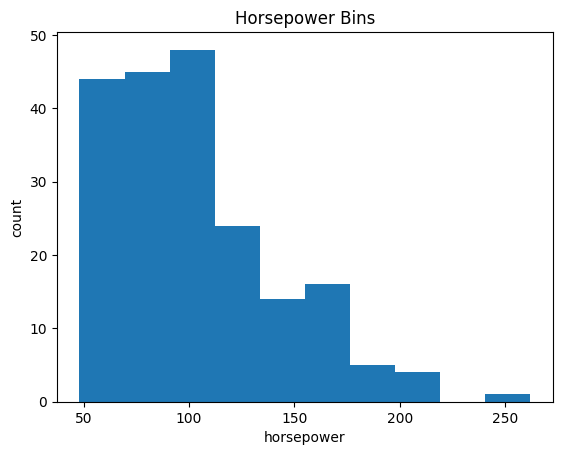

In [34]:
%matplotlib inline

plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower Bins")

<p>Find 3 bins of equal size bandwith by using NumPy's <code>linspace(start_value, end_value, numbers_generated)</code> function.</p>
<ul>
    <li>Since you want to include the minimum value of horsepower, set <code>start_value = min(df["horsepower"])</code>.</li>
    <li>Since you want to include the maximum value of horsepower, set <code>end_value = max(df["horsepower"])</code>.</li>
    <li>Since you are building 3 bins of equal length, you need 4 dividers, so <code>numbers_generated = 4</code>.</li>
</ul>

<p>Build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.</p>

In [35]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

<p>Set group names:</p>

In [36]:
group_names = ["Low", "Medium", "High"]

<p>Apply the function <code>pandas.cut()</code> to determine what each value of <code>df["horsepower"]</code> belongs to.</p>

In [37]:
df["horsepower-binned"] = pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df[["horsepower", "horsepower-binned"]].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


<p>See the number of vehicles in each bin:</p>

In [38]:
df["horsepower-binned"].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

<p>Plot the distribution of each bin:</p>

Text(0.5, 1.0, 'Horsepower Bins')

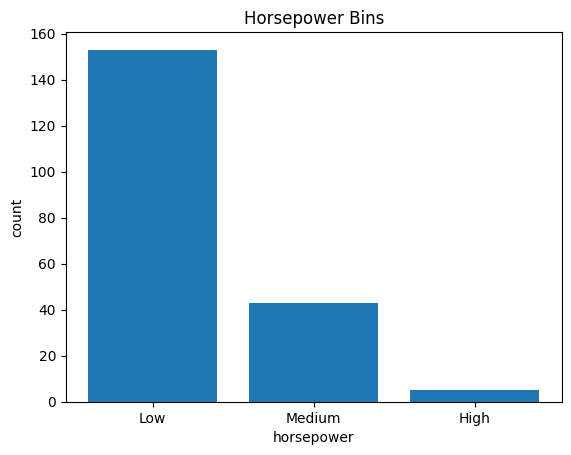

In [39]:
%matplotlib inline

plt.bar(group_names, df["horsepower-binned"].value_counts())
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower Bins")

<p>Look at the dataframe above carefully. You will find that the last column provides the bins for <code>horsepower</code> based on 3 categories ("Low", "Medium" and "High").<p>
<p>You successfully narrowed down the intervals from 59 to 3!</p>

#### Bins Visualization

<p>Normally, you use a histogram to visualize the distribution of bins we created above.</p>

Text(0.5, 1.0, 'Horsepower Bins')

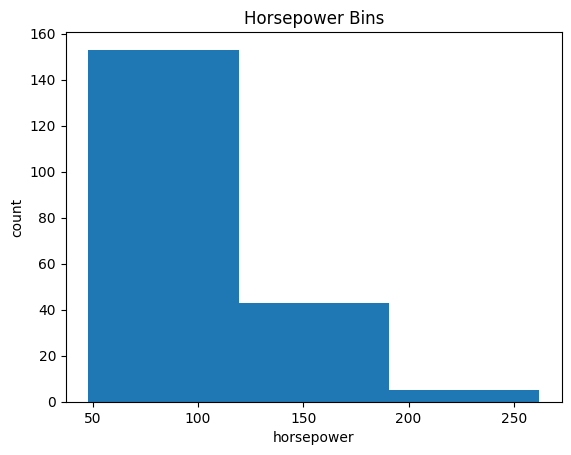

In [40]:
%matplotlib inline

plt.hist(df["horsepower"], bins=3)
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower Bins")

### Indicator Variable

<p><b>What is an indicator variable?</b></p>
<p>An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called "dummies" because the numbers themselves don't have inherent meaning.</p>
<p><b>Why use indicator variables?</b></p>
<p>You use indicator variables so you can use categorical variables for regression analysis in the later modules.</p>
<p><b>Example</b></p>
<p>The column <code>fuel-type</code> has two unique values: <b>gas</b> or <b>diesel</b>. Regression doesn't understand words, only numbers. To use this attribute in regression analysis, you can convert <code>fuel-type</code> to indicator variables.</p>
<p>Use the Panda method <code>get_dummies()</code> to assign numerical values to different categories of fuel type.</p>

In [41]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

<p>Get the indicator variables and assign it to dataframe <code>dummy_variable_1</code>.<p>

In [42]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


<p>Change the column names for clarity:</p>

In [43]:
dummy_variable_1.rename(columns={"gas": "fuel-type-gas", "diesel": "fuel-type-diesel"}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


<p>In the dataframe, column <code>fuel-type</code> now has values for <code>gas</code> and <code>diesel</code> as 0s and 1s.</p>

In [44]:
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis=1, inplace=True)

In [45]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True


<p>The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.</p>

#### Question

<p><b>Question 1</b> Similar to before, create an indicator variable for the column <code>aspiration</code>.</p>

In [46]:
dummy_variable_2 = pd.get_dummies(df["aspiration"])
dummy_variable_2.rename(columns={"std": "aspiration-std", "turbo": "aspiration-turbo"}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


<p><b>Question 2</b> Merge the new dataframe to the original dataframe, then drop the column <code>aspiration</code>.</p>

In [47]:
df = pd.concat([df, dummy_variable_2], axis=1)
df.drop("aspiration", axis=1, inplace=True)

In [48]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


<p>Save the new csv:</p>

In [49]:
df.to_csv(os.path.join(dir_path, "cleaned_auto.csv"))

****
This is the end of the file.
****